## Style Transfer with an Image Mask

Because we now have the universal style tranfer, we can make better styles by transfering said style to only part of an image. To do so, wa can make masks that will say where to place the style on the original image. 

We will consider the above code to make an Style Transfer Model (STF) based on the third block relu layer. 

We will first style an image with three different styles as we did in the code above. Then, using a mask function, we will transfer only the desired portion of the style to the content image. 

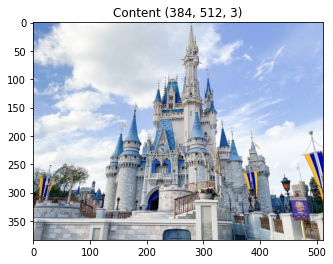

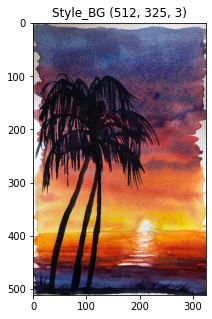

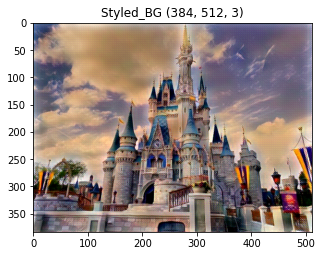

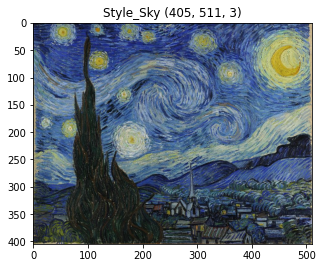

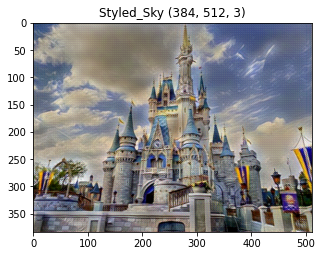

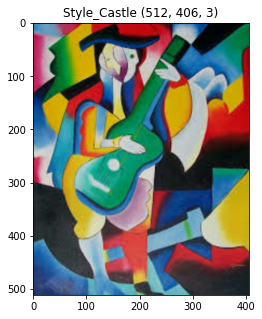

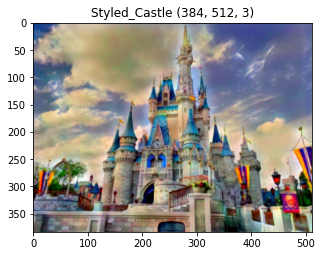

In [36]:
# We load the the model

STF = VGG19AutoEncoder('Block_Models')

# We load the content and style images

content_image = load_img('masks/content.png')
style_bg = load_img('masks/background_style.jpeg')
style_castle = load_img('masks/castle_style.jpg')
style_sky = load_img('masks/sky_style.jpg')

imshow(content_image,'Content')

# Using the previous function, we style the image

#Style it using the sky style
tmp = {'style':style_sky, 
       'content':content_image}

decoded_images_sky = STF(tmp)

#Style it using the castle style
tmp = {'style':style_castle, 
       'content':content_image}
decoded_images_castle = STF(tmp)


#Style it using the background style
tmp = {'style':style_bg, 
       'content':content_image}
decoded_images_bg = STF(tmp)


# We show the content image
# We show the style image
# We show the content image styled

plt.figure(figsize=(5,5))
imshow(style_bg,'Style_BG')
plt.figure(figsize=(5,5))
imshow(decoded_images_bg['layer3'][0],'Styled_BG')
plt.figure(figsize=(5,5))
imshow(style_sky,'Style_Sky')
plt.figure(figsize=(5,5))
imshow(decoded_images_sky['layer3'][0],'Styled_Sky')
plt.figure(figsize=(5,5))
imshow(style_castle,'Style_Castle')
plt.figure(figsize=(5,5))
imshow(decoded_images_castle['layer3'][0],'Styled_Castle')

# Here ALL the image is styled

We have a different style for the castle, for the sky and for the background. We created a mask for each of these parts of the image. The mask is the same size as the original content image, where the targeted section is black and the unwanted section is white. 

The mask_content function will transfer the style only to the targeted section of the image. 

In [40]:
# We make a funtion to mask the content

def mask_content(content, styled, mask):
    
    #We make an array of zeros the size of the 
    #styled image
    
    width, height, channels = styled.shape
    x = np.zeros(styled.shape)
    
    # We flatten the content image if it is
    # in more than 3d (if it comes with batches)
    if len(K.int_shape(content)) > 3:
        content = content[0,]
        
    # We take the mask and check which area is wanted
    for i in range(width):
        for j in range(height):
            
            if mask[i, j] == 1.:
                
                #This section is 1 (keep content)
                x[i, j, :] = content[i, j, :]
                
            else:
                
                 #This section is 0 (keep style)
                x[i, j, :] = styled[i, j, :]
    
    # Make the array a tf variable
    x = tf.Variable(x)
    return x

To make sure that the mask can be used, the mask has to be imported correctly. The load_mask function reads the image using the cv2 library and makes sure that the mask is a 2D binary matrix. 

In [41]:
# This function allows us to import the mask
# Masks should be black (wanted)
# and should be surrounded by white (unwanted)

def load_mask(mask_path, shape):
    
    #we read the image and put it in grayscale
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    # We will make the mask the 2D shape of the original
    width, height, _ = shape
    mask = resize(mask, (width, height)).astype('float32')

    # Perform binarization
    # We will keep only 1 (unwanted) and 1 (wanted)
    mask[mask <= 0] = 0
    mask[mask > 0] = 1
    
    return mask

We will now use the functions to import the masks and apply them to the image. 

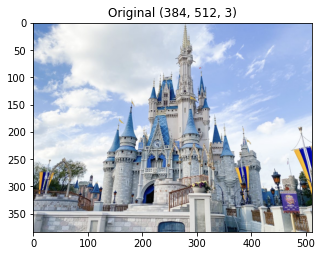

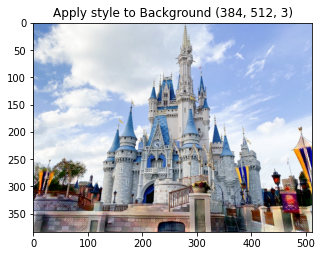

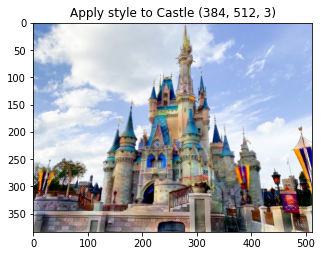

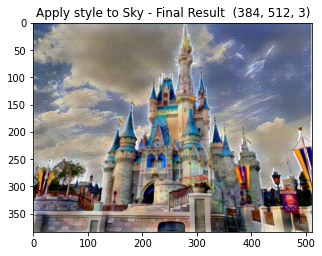

In [52]:
# Load masks using the above function

mask_bg = load_mask('masks/bg_mask.png',decoded_images_bg['layer3'][0].shape)
mask_castle = load_mask('masks/castle_mask.png',decoded_images_castle['layer3'][0].shape)
mask_sky = load_mask('masks/sky_mask.png',decoded_images_sky['layer3'][0].shape)

# We will plot the original image for comparison
plt.figure(figsize=(5,5))
imshow(content_image, "Original")

# Make the mask content with the first mask
out = mask_content(content = content_image, styled = decoded_images_bg['layer3'][0], mask = mask_bg)
plt.figure(figsize=(5,5))

# Take the above output and style the second mask
imshow(out, "Apply style to Background")
out1 = mask_content(content = out, styled = decoded_images_castle['layer3'][0], mask = mask_castle)
plt.figure(figsize=(5,5))

# Take the above output and style the third mask 
# This will be the result of applying 3 styles each to a section of the content
imshow(out1, "Apply style to Castle")
out2 = mask_content(content = out1, styled = decoded_images_sky['layer3'][0], mask = mask_sky)
plt.figure(figsize=(5,5))
imshow(out2, "Apply style to Sky - Final Result ")

We do this for a second example: 

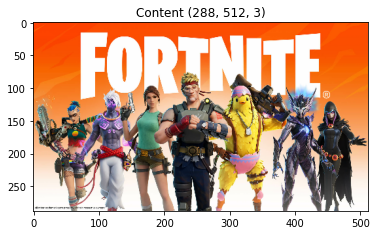

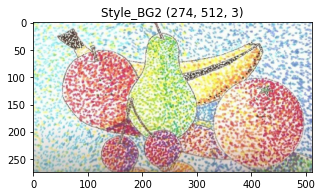

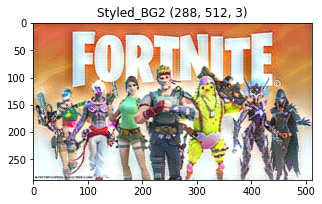

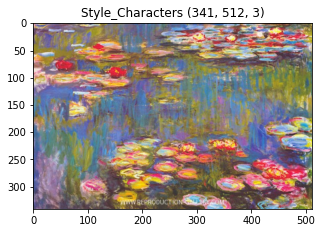

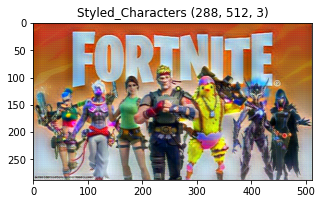

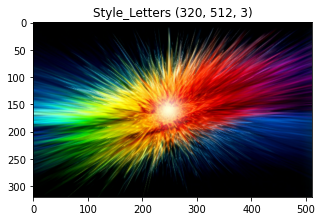

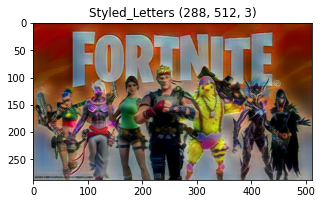

In [60]:
# We load the content and style images

content2_image = load_img('masks/content2.jpg')
style_bg2 = load_img('masks/style_bg2.jpg')
style_characters = load_img('masks/style_characters.jpg')
style_letters = load_img('masks/style_letters.jpg')

imshow(content2_image,'Content')

# Using the previous function, we style the image

#Style it using the bg2 style
tmp = {'style':style_bg2, 
       'content':content2_image}

decoded_images_bg2 = AE(tmp)

#Style it using the castle style
tmp = {'style':style_characters, 
       'content':content2_image}
decoded_images_characters = AE(tmp)


#Style it using the background style
tmp = {'style':style_letters, 
       'content':content2_image}
decoded_images_letters = AE(tmp)


# We show the content image
# We show the style image
# We show the content image styled

plt.figure(figsize=(5,5))
imshow(style_bg2,'Style_BG2')
plt.figure(figsize=(5,5))
imshow(decoded_images_bg2['layer3'][0],'Styled_BG2')
plt.figure(figsize=(5,5))
imshow(style_characters,'Style_Characters')
plt.figure(figsize=(5,5))
imshow(decoded_images_characters['layer3'][0],'Styled_Characters')
plt.figure(figsize=(5,5))
imshow(style_letters,'Style_Letters')
plt.figure(figsize=(5,5))
imshow(decoded_images_letters['layer3'][0],'Styled_Letters')

# Here ALL the image is styled

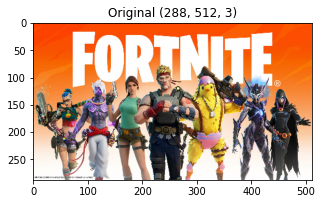

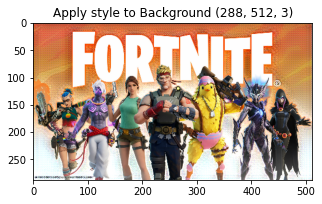

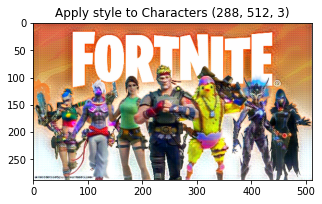

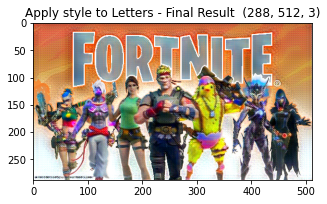

In [63]:
# Load masks using the above function

mask_bg2 = load_mask('masks/bg2_mask.png',decoded_images_bg2['layer3'][0].shape)
mask_characters = load_mask('masks/characters_mask.png',decoded_images_characters['layer3'][0].shape)
mask_letters = load_mask('masks/letters_mask.png',decoded_images_letters['layer3'][0].shape)

# We will plot the original image for comparison
plt.figure(figsize=(5,5))
imshow(content2_image, "Original")

# Make the mask content with the first mask
out = mask_content(content = content2_image, styled = decoded_images_bg2['layer3'][0], mask = mask_bg2)
plt.figure(figsize=(5,5))

# Take the above output and style the second mask
imshow(out, "Apply style to Background")
out1 = mask_content(content = out, styled = decoded_images_characters['layer3'][0], mask = mask_characters)
plt.figure(figsize=(5,5))

# Take the above output and style the third mask 
# This will be the result of applying 3 styles each to a section of the content
imshow(out1, "Apply style to Characters")
out2 = mask_content(content = out1, styled = decoded_images_letters['layer3'][0], mask = mask_letters)
plt.figure(figsize=(5,5))
imshow(out2, "Apply style to Letters - Final Result ")

For our final thoughts, the style transfer is really simple to understand. The VGG encoder decoder is a good solution to have a universal style transfer model. But now that we see the results, we believe that it is a model that is not so easy to train as it is to understand. The model will only be as good as the decoder. The style transfer using mask was also subjected to this, so even though the style was only applied to the desired section, the result was not so good. 

References:
- [1] Li, Yijun, et al. "Universal style transfer via feature transforms." arXiv preprint arXiv:1705.08086 (2017).
- [2] https://github.com/8000net/universal-style-transfer-keras
- [3] https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5
- [4] https://www.dropbox.com/sh/2djb2c0ohxtvy2t/AAAxA2dnoFBcHGqfP0zLx-Oua?dl=0